In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/heart.csv


In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('/kaggle/input/heart-disease/heart.csv')

Text(0.5, 1.0, 'Percent missing data by feature')

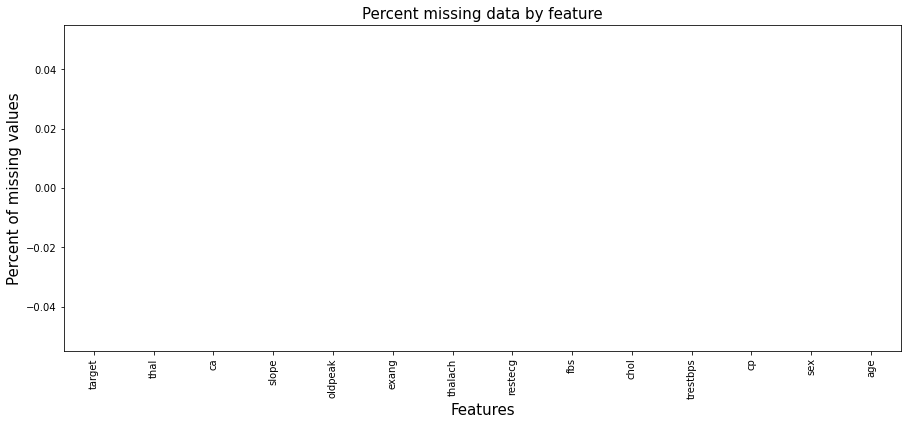

In [142]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)


    Age: Age
    Sex: Sex (1 = male; 0 = female)
    ChestPain: Chest pain (typical, asymptotic, nonanginal, nontypical)
    RestBP: Resting blood pressure
    Chol: Serum cholestoral in mg/dl
    Fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    RestECG: Resting electrocardiographic results
    MaxHR: Maximum heart rate achieved
    ExAng: Exercise induced angina (1 = yes; 0 = no)
    Oldpeak: ST depression induced by exercise relative to rest
    Slope: Slope of the peak exercise ST segment
    Ca: Number of major vessels colored by flourosopy (0 - 3)
    Thal: (3 = normal; 6 = fixed defect; 7 = reversable defect)
    target: AHD - Diagnosis of heart disease (1 = yes; 0 = no)



In [106]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


    If the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical.
    If the skewness is between -1 to -0.5 or 0.5 to 1 then data is moderately skewed.
    And if the skewness is less than -1 and greater than +1 then our data is heavily skewed.

column trestbps skewvalue 0.7137684379181465
column chol skewvalue 1.1434008206693387
column thalach skewvalue -0.5374096526832253
column oldpeak skewvalue 1.269719930601997


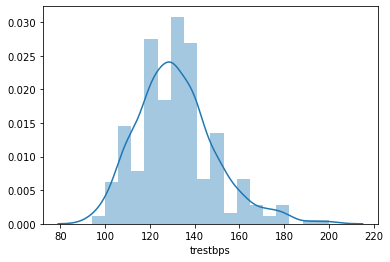

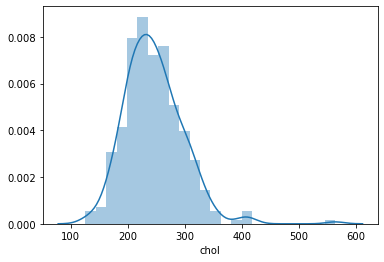

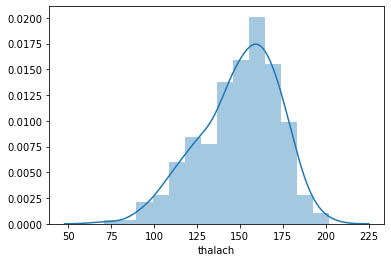

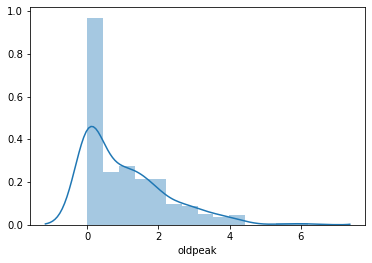

In [169]:
cols=['trestbps','chol','thalach','oldpeak']
for i in data[cols]:
    print("column",i,"skewvalue",data[i].skew(axis=0))
    plt.figure()
    sns.distplot(data[i])



column chol skewvalue 1.1434008206693387
column chol_transformed skewvalue 0.09024215570984805


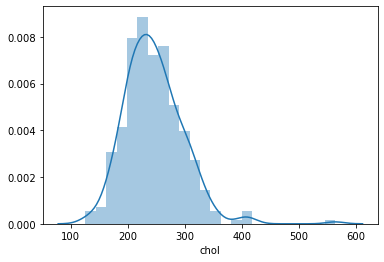

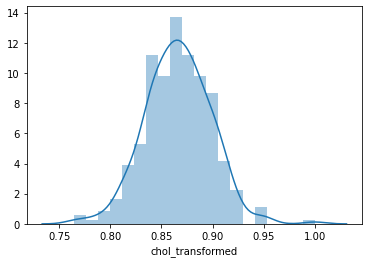

In [170]:
df=pd.read_csv('/kaggle/input/heart-disease/heart.csv')
df['chol_transformed']=np.log(df['chol']+1)
df['chol_transformed']=df['chol_transformed']/df['chol_transformed'].max()
cols=['chol','chol_transformed']
for i in df[cols]:
    print("column",i,"skewvalue",df[i].skew(axis=0))
    plt.figure()
    sns.distplot(df[i])

column oldpeak skewvalue 1.269719930601997
column oldpeak_transformed skewvalue 0.07050448155244952


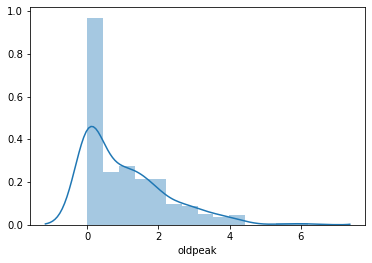

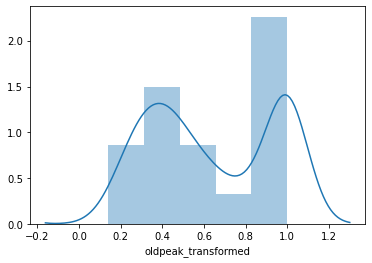

In [171]:
# df=pd.read_csv('/kaggle/input/heart-disease/heart.csv')
df['oldpeak_transformed']=np.reciprocal(df['oldpeak']+1)
df['oldpeak_transformed']=df['oldpeak_transformed']/df['oldpeak_transformed'].max()
cols=['oldpeak','oldpeak_transformed']
for i in df[cols]:
    print("column",i,"skewvalue",df[i].skew(axis=0))
    plt.figure()
    sns.distplot(df[i])

column thalach_transformed skewvalue 0.1803430708330624
column thalach skewvalue -0.5374096526832253


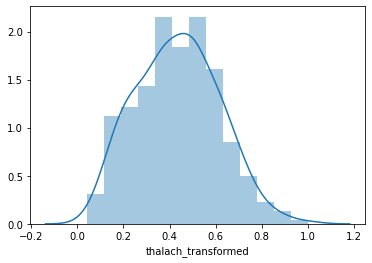

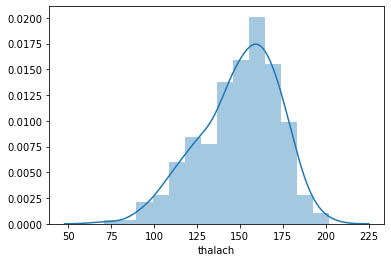

In [172]:
# df=pd.read_csv('/kaggle/input/heart-disease/heart.csv')
df['thalach_transformed']=np.power(df['thalach'],3)
df['thalach_transformed']=df['thalach_transformed']/df['thalach_transformed'].max()
cols=['thalach_transformed','thalach']
for i in df[cols]:
    print("column",i,"skewvalue",df[i].skew(axis=0))
    plt.figure()
    sns.distplot(df[i])

column trestbps_transformed skewvalue 0.2848369221609833
column trestbps skewvalue 0.7137684379181465


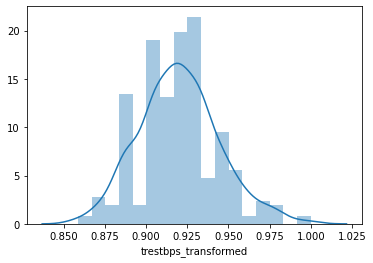

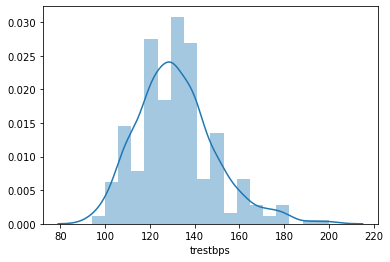

In [173]:
# df=pd.read_csv('/kaggle/input/heart-disease/heart.csv')
df['trestbps_transformed']=np.log(df['trestbps']+1)
df['trestbps_transformed']=df['trestbps_transformed']/df['trestbps_transformed'].max()
cols=['trestbps_transformed','trestbps']
for i in df[cols]:
    print("column",i,"skewvalue",df[i].skew(axis=0))
    plt.figure()
    sns.distplot(df[i])

In [174]:
df.columns.tolist()


['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target',
 'chol_transformed',
 'oldpeak_transformed',
 'thalach_transformed',
 'trestbps_transformed']

In [158]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [213]:
cols=['age','sex','cp','exang','ca','slope','thal','restecg','chol_transformed','oldpeak_transformed','thalach_transformed','trestbps_transformed','target']
dataset=df[cols]

In [214]:
dataset

,age,sex,cp,exang,ca,slope,thal,restecg,chol_transformed,oldpeak_transformed,thalach_transformed,trestbps_transformed,target
0,63,1,3,0,0,0,1,0,0.860892,0.303030,0.409468,0.939717,1
1,37,1,2,0,0,0,2,1,0.871959,0.222222,0.793361,0.919275,1
2,41,0,1,0,0,2,2,0,0.840012,0.416667,0.617350,0.919275,1
3,56,1,1,0,0,2,2,1,0.862902,0.555556,0.684236,0.904302,1
4,57,0,0,1,0,2,2,1,0.926666,0.625000,0.525423,0.904302,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,1,0,1,3,1,0.866197,0.833333,0.225767,0.933146,0
299,45,1,3,0,0,1,3,1,0.880524,0.454545,0.279041,0.888037,0
300,68,1,0,0,2,1,3,1,0.831309,0.227273,0.340097,0.938421,0
301,57,1,0,1,1,1,3,1,0.770544,0.454545,0.184518,0.919275,0


In [215]:
values=dataset.values
X, y = values[:, :-1], values[:, -1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.4, random_state = 2, stratify = y)


In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import r2_score

rfc = LogisticRegression(solver='liblinear',random_state = 42 )
# accuracies = cross_val_score(rfc, X_train, y_train, cv=3)
rfc.fit(X_train,y_train)
# pred = rfc.predict(X_test)
# print("Train Score:",np.mean(accuracies))
# print("Test Score:",rfc.score(X_test,y_test))
# print("The Accuracy Score is:", metrics.accuracy_score(y_test,pred))


Train Score: 0.8400900900900901
Test Score: 0.8032786885245902
The Accuracy Score is: 0.8032786885245902


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
